In [ ]:
import tensorflow as tf


In [ ]:
# !pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.size

47040000

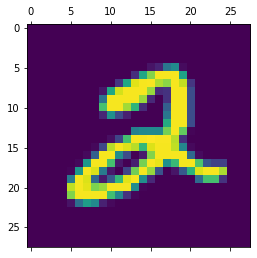

In [ ]:
plt.matshow(X_train[5])

In [ ]:
y_train[5]

2

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Step 2: Data Standardization

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Step 3 Image falattening

## step 4 Create NN model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(600,activation = 'relu'),
     keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dense(10,activation = 'sigmoid')]
)

# loss = for  multiclass classificattion = 'sparse_categoorical_crossentropy'
# loss = for binary classification = 'categorical_crossentropy'

# compile your model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5)
model.evaluate(X_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1882 - accuracy: 0.9434
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0803 - accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.9867
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9738


[0.08854503929615021, 0.973800003528595]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 600)               471000    
                                                                 
 dense_1 (Dense)             (None, 100)               60100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 532,110
Trainable params: 532,110
Non-trainable params: 0
_________________________________________________________________


params is neuron you have created

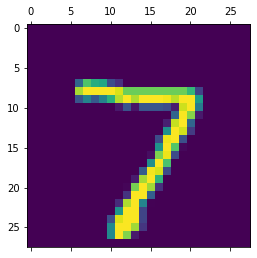

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_test[0]

7

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predict = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predict[4]

array([2.1050739e-04, 3.4057072e-03, 1.0372237e-02, 4.1796130e-04,
       9.9999225e-01, 1.3032938e-04, 3.4874122e-04, 5.7036465e-01,
       8.8065531e-04, 9.9991775e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[4])

4

In [ ]:
y_pred = [np.argmax(i) for i in y_predict]

In [ ]:
# accuracy measures by classification_report()
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.95      0.99      0.97       892
           6       1.00      0.96      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.92      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = tf.math.confusion_matrix(labels= y_test,predictions = y_pred)
cnf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 929,    1,    5,    1,    3,    4,    0,    2,    2,   33],
       [   0, 1128,    0,    0,    0,    2,    2,    1,    2,    0],
       [   0,    3,  999,    5,    2,    0,    1,   15,    6,    1],
       [   0,    0,    4,  976,    0,    9,    0,    6,    3,   12],
       [   0,    0,    5,    0,  954,    1,    1,    2,    0,   19],
       [   1,    0,    0,    4,    1,  879,    0,    0,    4,    3],
       [   2,    2,    3,    1,    7,   18,  920,    0,    3,    2],
       [   0,    2,    4,    0,    3,    0,    0, 1007,    2,   10],
       [   0,    0,    4,    2,    0,    8,    0,    3,  953,    4],
       [   0,    2,    0,    1,    3,    3,    0,    2,    5,  993]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

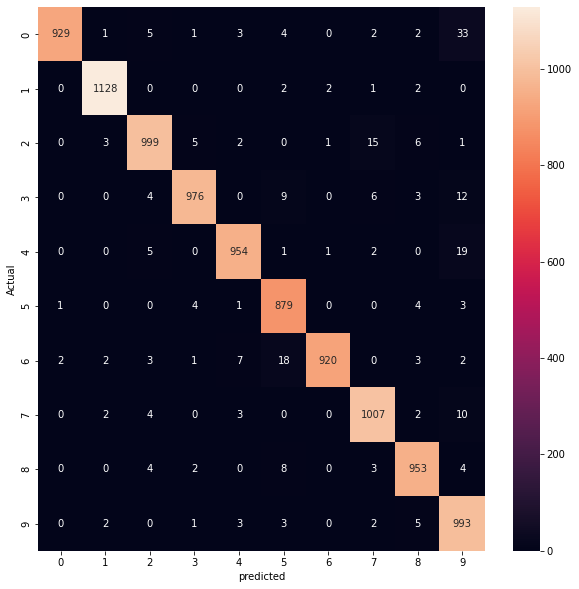

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cnf_matrix,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Actual')

### so from heatmap we can see how many misclassification has shown in this report